# Test de Alerta sobre un noviazgo violento

In [87]:
# Analisis exploratorio.
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from matplotlib import rcParams

# Standar Scaler
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.neighbors import KNeighborsClassifier # vecinos cercanos
from sklearn.naive_bayes import GaussianNB # Bayes
from sklearn.tree import DecisionTreeClassifier # arbol de decision
from sklearn import svm # Maquinas de soporte

# Test y Entrenamiento
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score

In [88]:
df = pd.read_csv('resultados-del-test-febrero-octubre-2018.csv', sep=';')

In [89]:
df.head()

,FECHA,HORA,EDAD,GENERO,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10
0,13/02/2017,23:41,28,HOMBRE,PALERMO,B,B,B,B,B,B,B,B,B,B
1,13/02/2017,20:09,23,MUJER,BALVANERA,B,B,B,B,B,B,B,B,B,B
2,13/02/2017,20:07,22,MUJER,BALVANERA,A,A,A,A,A,A,A,A,B,C
3,13/02/2017,20:04,34,MUJER,VILLA PUEYRREDON,C,C,B,C,B,C,C,C,C,B
4,13/02/2017,19:34,31,MUJER,CABALLITO,C,C,C,C,C,C,C,C,C,C


In [90]:
df.shape

(11643, 15)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11643 entries, 0 to 11642
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    11643 non-null  object
 1   HORA     11643 non-null  object
 2   EDAD     11643 non-null  object
 3   GENERO   11643 non-null  object
 4   BARRIO   11643 non-null  object
 5   PREG_1   11643 non-null  object
 6   PREG_2   11643 non-null  object
 7   PREG_3   11643 non-null  object
 8   PREG_4   11643 non-null  object
 9   PREG_5   11643 non-null  object
 10  PREG_6   11643 non-null  object
 11  PREG_7   11643 non-null  object
 12  PREG_8   11643 non-null  object
 13  PREG_9   11643 non-null  object
 14  PREG_10  11643 non-null  object
dtypes: object(15)
memory usage: 1.3+ MB


In [92]:
df['GENERO'].unique()

array(['HOMBRE', 'MUJER', 'OTRO'], dtype=object)

In [93]:
df.columns

Index(['FECHA', 'HORA', 'EDAD', 'GENERO', 'BARRIO', 'PREG_1', 'PREG_2',
       'PREG_3', 'PREG_4', 'PREG_5', 'PREG_6', 'PREG_7', 'PREG_8', 'PREG_9',
       'PREG_10'],
      dtype='object')

Información respecto a las 10 preguntas y sus valores:

pregunta 1: Cuando no están juntos, ¿tu pareja te controla preguntándote con quién estás, dónde y qué estás haciendo mensajeando por celular?

pregunta 2: ¿Revisa los mensajes de tu celular o te pidió la contraseña de tu correo electrónico, Facebook o Instagram como “prueba de confianza”?

pregunta 3: ¿Te acusa de haber sido infiel o coquetear con otros/as?

pregunta 4: ¿Sentís que están permanentemente en tensión y que, hagas lo que hagas, se irrita o te culpabiliza de sus cambios de humor?

pregunta 5: ¿Le molesta que hagas actividades de manera independiente, como estudiar, trabajar, visitar amigos/as, ir al gimnasio o elegir quedarte sola/o en tu casa?

pregunta 6: ¿Sentís que te alejaste o perdiste contacto con amigos/as o familiares desde que estás en pareja?

pregunta 7: ¿Te dice cómo tenés que vestirte o cómo debe ser tu apariencia?

pregunta 8: ¿Menosprecia en público o en privado tus opiniones?

pregunta 9: ¿Te dice que todo lo que hacés está mal o que no servís para nada?

pregunta 10: ¿Te amenaza con lastimarse/te si no lo/la obedeces o si querés terminar la relación?


#### Información sobre las respuestas al test de Señales de Alerta en el noviazgo. Referencias: A="siempre" B="a veces" C="nunca"



### En primer lugar vamos a reemplazar los valores categoricos por numericos.

In [94]:
df['PREG_1'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_2'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_3'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_4'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_5'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_6'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_7'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_8'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_9'].replace(['A','B','C'], [0,1,2], inplace=True)
df['PREG_10'].replace(['A','B','C'], [0,1,2], inplace=True)

# Le cambiamos los valores al genero por 0 y 1 (0 = mujer, 1 = homre, 2 = otro)
df = pd.get_dummies(df, columns=['GENERO'])

# Si observamos la edad, los que marcan 18 tienen el signo <18. Vamos a reemplazarlo por 18.
df['EDAD'].replace(['<18'],[18], inplace=True)

#### Las referencias quedarian asi: 0 ="siempre" 1 ="a veces" 2 ="nunca"

In [95]:
df

,FECHA,HORA,EDAD,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO
0,13/02/2017,23:41,28,PALERMO,1,1,1,1,1,1,1,1,1,1,1,0,0
1,13/02/2017,20:09,23,BALVANERA,1,1,1,1,1,1,1,1,1,1,0,1,0
2,13/02/2017,20:07,22,BALVANERA,0,0,0,0,0,0,0,0,1,2,0,1,0
3,13/02/2017,20:04,34,VILLA PUEYRREDON,2,2,1,2,1,2,2,2,2,1,0,1,0
4,13/02/2017,19:34,31,CABALLITO,2,2,2,2,2,2,2,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638,23/01/2018,18:37,18,PARQUE CHAS,0,1,1,0,2,0,1,1,2,1,0,1,0
11639,23/01/2018,16:40,30,ALMAGRO,1,2,1,2,2,1,1,2,1,2,0,1,0
11640,23/01/2018,13:02,18,FLORES,2,2,2,1,2,2,2,2,2,2,0,1,0
11641,24/01/2018,11:40,49,CONSTITUCION,0,0,0,0,0,0,1,0,0,1,1,0,0


0 = NO

1 = SI

### Eliminamos las columnas que no nos van a servir para preparar el algoritmo.

In [96]:
df_train = df.drop(columns=['FECHA','HORA','BARRIO'])

In [97]:
df_train.head()

,EDAD,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO
0,28,1,1,1,1,1,1,1,1,1,1,1,0,0
1,23,1,1,1,1,1,1,1,1,1,1,0,1,0
2,22,0,0,0,0,0,0,0,0,1,2,0,1,0
3,34,2,2,1,2,1,2,2,2,2,1,0,1,0
4,31,2,2,2,2,2,2,2,2,2,2,0,1,0


### Vamos a estandarizar los valores. Para eso vamos a utilizar StandarScaler

In [98]:
df_norm = StandardScaler().fit_transform(df_train)
print(df_norm)

[[-0.0329411  -0.08012532 -0.55957676 ...  1.6575116  -1.63951058
  -0.06567303]
 [-0.57085593 -0.08012532 -0.55957676 ... -0.60331403  0.60993812
  -0.06567303]
 [-0.6784389  -1.47251201 -1.86026595 ... -0.60331403  0.60993812
  -0.06567303]
 ...
 [-1.10877076  1.31226138  0.74111244 ... -0.60331403  0.60993812
  -0.06567303]
 [ 2.22630118 -1.47251201 -1.86026595 ...  1.6575116  -1.63951058
  -0.06567303]
 [-0.0329411  -1.47251201 -0.55957676 ... -0.60331403  0.60993812
  -0.06567303]]


# APRENDIZAJE NO SUPERVISADO : KMEANS

Como en el dataset no tenemos una variable dependiente, vamos a crear grupos con el algoritmo k means.

Para entrenar los datos, vamos a dar unos pasos:

#### 1) Importamos kmeans de sklearn.
#### 2) Vamos a utilizar el codo para definir la cantidad de grupos a armar.
#### 3) Entrenamos los datos.

In [99]:
# 1) Importamos kmeans

from sklearn.cluster import KMeans

In [100]:
# 2)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, max_iter= 1000 )
    kmeans.fit(df_train)        # Aplico K-means a la base de datos
    wcss.append(kmeans.inertia_) 

#### Graficamos el codo

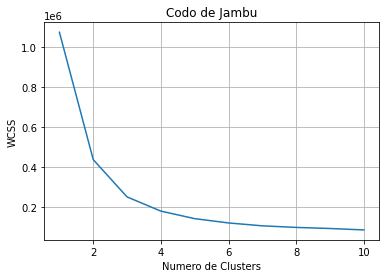

In [101]:
plt.plot(range(1,11), wcss)
plt.title('Codo de Jambu')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Vemos que a partir de 2 clusters la pendiente ya no es tan grande. Por lo tanto, utilizaremos 2 grupos.

### Aplicamos k means al dataset.

In [102]:
# Creamos el modelo
clustering = KMeans( n_clusters= 2, max_iter= 300 )

# Aplicamos el modelo
clustering.fit(df_norm)

KMeans(n_clusters=2)

Una vez que aplicamos el modelo, vamos a agregar a qué número de cluster corresponde cada individuo. Para esto, se lo agregaremos al dataset original.

In [103]:
# Los resultados del clustering están dentro de labels_

df['Numero de Cluster'] = clustering.labels_
df.head()

,FECHA,HORA,EDAD,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO,Numero de Cluster
0,13/02/2017,23:41,28,PALERMO,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,13/02/2017,20:09,23,BALVANERA,1,1,1,1,1,1,1,1,1,1,0,1,0,1
2,13/02/2017,20:07,22,BALVANERA,0,0,0,0,0,0,0,0,1,2,0,1,0,1
3,13/02/2017,20:04,34,VILLA PUEYRREDON,2,2,1,2,1,2,2,2,2,1,0,1,0,0
4,13/02/2017,19:34,31,CABALLITO,2,2,2,2,2,2,2,2,2,2,0,1,0,0


### Vamos a visualizar los clusters que se formaron

Para esto utilizaremos PCA. De esta manera, vamos a poder crear 2 componentes principales que representan lo mejor posible a las otras variables.

In [104]:
# Importamos PCA

from sklearn.decomposition import PCA

# Numero de componentes (o variables)
pca = PCA(n_components= 2)
pca_df = pca.fit_transform(df_norm)
pca_df2 = pd.DataFrame(data= pca_df, columns= ['Componente 1','Componente 2'])
pca_ind = pd.concat([pca_df2, df[['Numero de Cluster']]], axis=1)

pca_ind


,Componente 1,Componente 2,Numero de Cluster
0,1.524932,2.104247,1
1,1.390236,-1.053290,1
2,4.384515,-0.919785,1
3,-1.471475,-0.679079,0
4,-2.820220,-0.727368,0
...,...,...,...
11638,1.807968,-0.973359,1
11639,-0.767186,-0.878078,0
11640,-2.422837,-0.923603,0
11641,4.948038,2.506970,1


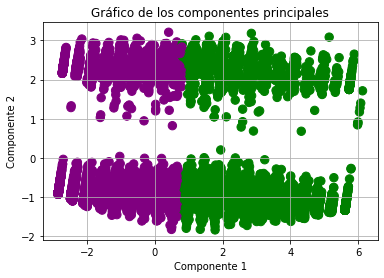

In [105]:
colores = np.array(['purple', 'green', 'yellow'])

plt.scatter(pca_ind['Componente 1'],
            pca_ind['Componente 2']
            , c = colores[pca_ind['Numero de Cluster']],
            s=70)
plt.title('Gráfico de los componentes principales')
plt.grid(True)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

================================================================

### Comparemos entre una persona del grupo 0 y 1.

In [106]:
p_cluster0 = df.iloc[4]
p_cluster1 = df.iloc[1]

In [107]:
print(p_cluster1)

FECHA                13/02/2017
HORA                      20:09
EDAD                         23
BARRIO                BALVANERA
PREG_1                        1
PREG_2                        1
PREG_3                        1
PREG_4                        1
PREG_5                        1
PREG_6                        1
PREG_7                        1
PREG_8                        1
PREG_9                        1
PREG_10                       1
GENERO_HOMBRE                 0
GENERO_MUJER                  1
GENERO_OTRO                   0
Numero de Cluster             1
Name: 1, dtype: object


Las personas que seleccione son del sexo femenino. Vamos a ir viendo cuál fue su respuesta a las 10 preguntas para compararlas.

In [108]:
df_comparacion = pd.DataFrame(columns=['Preguntas','p_cluster0', 'p_cluster1'])

rta_cluster0 = [2,2,2,2,2,2,2,2,2,2]
rta_cluster1 = [1,1,1,1,1,1,1,1,1,1]
preg = np.arange(1,11)

df_comparacion['Preguntas'] = preg
df_comparacion['p_cluster0'] = rta_cluster0
df_comparacion['p_cluster1'] = rta_cluster1

df_comparacion.head()                             

,Preguntas,p_cluster0,p_cluster1
0,1,2,1
1,2,2,1
2,3,2,1
3,4,2,1
4,5,2,1


Vamos a cambiar los valores numericos por categoricos de las respuestas

##### pregunta 1: Cuando no están juntos, ¿tu pareja te controla preguntándote con quién estás, dónde y qué estás haciendo mensajeándote por celular?

##### pregunta 2: ¿Revisa los mensajes de tu celular o te pidió la contraseña de tu correo electrónico, Facebook o Instagram como “prueba de confianza”?

##### pregunta 3: ¿Te acusa de haber sido infiel o coquetear con otros/as?

##### pregunta 4: ¿Sentís que están permanentemente en tensión y que, hagas lo que hagas, se irrita o te culpabiliza de sus cambios de humor?

##### pregunta 5: ¿Le molesta que hagas actividades de manera independiente, como estudiar, trabajar, visitar amigos/as, ir al gimnasio o elegir quedarte sola/o en tu casa?

##### pregunta 6: ¿Sentís que te alejaste o perdiste contacto con amigos/as o familiares desde que estás en pareja?

##### pregunta 7: ¿Te dice cómo tenés que vestirte o cómo debe ser tu apariencia?

##### pregunta 8: ¿Menosprecia en público o en privado tus opiniones?

##### pregunta 9: ¿Te dice que todo lo que hacés está mal o que no servís para nada?

##### pregunta 10: ¿Te amenaza con lastimarse/te si no lo/la obedecés o si querés terminar la relación?

In [109]:
df_comparacion['p_cluster0'].replace([0,1,2], ['Siempre','A veces','Nunca'], inplace=True)
df_comparacion['p_cluster1'].replace([0,1,2], ['Siempre','A veces','Nunca'], inplace=True)

df_comparacion

,Preguntas,p_cluster0,p_cluster1
0,1,Nunca,A veces
1,2,Nunca,A veces
2,3,Nunca,A veces
3,4,Nunca,A veces
4,5,Nunca,A veces
5,6,Nunca,A veces
6,7,Nunca,A veces
7,8,Nunca,A veces
8,9,Nunca,A veces
9,10,Nunca,A veces


Si observamos las preguntas y comparamos dos individuos de diferentes grupos, notamos de forma muy clara cómo las personas que pertenecen al grupo número 1 tienen más posibilidades de sufrir violencia de género o ya la están sufriendo.

En cambio, aquellos que pertenecen al grupo número 0, aparentemente su situación es bastante normal.